## Chargement données

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/PIP2025_G8/Donnees/"

In [4]:
vehicules=pd.read_csv(path+"Autres données/nb_voiture_annee_cdr.csv")
vehicules.head()

<ipython-input-4-733ffaf9f312>:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicules=pd.read_csv(path+"Autres données/nb_voiture_annee_cdr.csv")


codgeo                   libgeo  nb_vp_rechargeables_el  \
0  01001  L'ABERGEMENT-CLÉMENCIAT                       6   
1  01001  L'ABERGEMENT-CLÉMENCIAT                       6   
2  01001  L'ABERGEMENT-CLÉMENCIAT                      11   
3  01001  L'ABERGEMENT-CLÉMENCIAT                      16   
4  01002    L'ABERGEMENT-DE-VAREY                       1   

   nb_vp_rechargeables_gaz  nb_vp code_dep nom_departement  code_region  \
0                        0    881       01             Ain           84   
1                        0    893       01             Ain           84   
2                        0    916       01             Ain           84   
3                        0    952       01             Ain           84   
4                        0    278       01             Ain           84   

             nom_region  annee  
0  Auvergne-Rhône-Alpes   2020  
1  Auvergne-Rhône-Alpes   2021  
2  Auvergne-Rhône-Alpes   2022  
3  Auvergne-Rhône-Alpes   2024  
4  Auvergne-Rhône-Alpes   2020

In [5]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184132 entries, 0 to 184131
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   codgeo                   184132 non-null  object
 1   libgeo                   184132 non-null  object
 2   nb_vp_rechargeables_el   184132 non-null  int64 
 3   nb_vp_rechargeables_gaz  184132 non-null  int64 
 4   nb_vp                    184132 non-null  int64 
 5   code_dep                 184132 non-null  object
 6   nom_departement          184132 non-null  object
 7   code_region              184132 non-null  int64 
 8   nom_region               184132 non-null  object
 9   annee                    184132 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 14.0+ MB


In [6]:
vehicules

codgeo                   libgeo  nb_vp_rechargeables_el  \
0       01001  L'ABERGEMENT-CLÉMENCIAT                       6   
1       01001  L'ABERGEMENT-CLÉMENCIAT                       6   
2       01001  L'ABERGEMENT-CLÉMENCIAT                      11   
3       01001  L'ABERGEMENT-CLÉMENCIAT                      16   
4       01002    L'ABERGEMENT-DE-VAREY                       1   
...       ...                      ...                     ...   
184127  95999                  FORAINS                       0   
184128   9997            NON IDENTIFIE                       0   
184129   9997            NON IDENTIFIE                       0   
184130   9999                  FORAINS                       0   
184131   9999                  FORAINS                       0   

        nb_vp_rechargeables_gaz  nb_vp code_dep nom_departement  code_region  \
0                             0    881       01             Ain           84   
1                             0    893       01             Ain           84   
2                             0    916       01             Ain           84   
3                             0    952       01             Ain           84   
4                             0    278       01             Ain           84   
...                         ...    ...      ...             ...          ...   
184127                        0   1636       95      Val-d'Oise           11   
184128                        0      1        9          Ariège           76   
184129                        0      1        9          Ariège           76   
184130                        0    126        9          Ariège           76   
184131                        0    129        9          Ariège           76   

                  nom_region  annee  
0       Auvergne-Rhône-Alpes   2020  
1       Auvergne-Rhône-Alpes   2021  
2       Auvergne-Rhône-Alpes   2022  
3       Auvergne-Rhône-Alpes   2024  
4       Auvergne-Rhône-Alpes   2020  
...                      ...    ...  
184127         Île-de-France   2024  
184128             Occitanie   2022  
184129             Occitanie   2024  
184130             Occitanie   2020  
184131             Occitanie   2021  

[184132 rows x 10 columns]

In [7]:
resultat=vehicules.groupby('annee')[['nb_vp_rechargeables_el']].sum()

In [8]:
resultat

nb_vp_rechargeables_el
annee                        
2020                   409560
2021                   742232
2022                  1086051
2023                  1570355
2024                  1788875

### Reconstitution du dataset

In [10]:
data=pd.read_json(path+"DonneesBrutes/Voiture/voitures-par-commune-par-energie.json")

In [11]:
data['date_arrete'] = pd.to_datetime(data['date_arrete'])
data["annee"]= data['date_arrete'].dt.year
data["trimestre"]= data['date_arrete'].dt.quarter
nb_veh_par_annees = (
    data.loc[data.groupby(['codgeo', 'annee'])['trimestre'].idxmax()]
    .sort_values(by=['codgeo', 'annee'])
)

In [12]:
nb_veh_par_annees

codgeo                   libgeo       epci          libepci  \
116136  01001  L'ABERGEMENT-CLÉMENCIAT  200069193  CC de la Dombes   
317921  01001  L'ABERGEMENT-CLÉMENCIAT  200069193  CC de la Dombes   
317923  01001  L'ABERGEMENT-CLÉMENCIAT  200069193  CC de la Dombes   
317927  01001  L'ABERGEMENT-CLÉMENCIAT  200069193  CC de la Dombes   
317928  01001  L'ABERGEMENT-CLÉMENCIAT  200069193  CC de la Dombes   
...       ...                      ...        ...              ...   
228485  97897            NON IDENTIFIE       None             None   
228487  97897            NON IDENTIFIE       None             None   
228489  97897            NON IDENTIFIE       None             None   
19407   97897            NON IDENTIFIE       None             None   
228490  97897            NON IDENTIFIE       None             None   

       date_arrete  nb_vp_rechargeables_el  nb_vp_rechargeables_gaz  nb_vp  \
116136  2020-12-31                       6                        0    881   
317921  2021-12-31                       8                        0    890   
317923  2022-12-31                      10                        0    920   
317927  2023-12-31                      14                        0    943   
317928  2024-06-30                      21                        0    957   
...            ...                     ...                      ...    ...   
228485  2020-12-31                       0                        0      1   
228487  2021-12-31                       0                        0      1   
228489  2022-12-31                       0                        0      1   
19407   2023-12-31                       0                        0      1   
228490  2024-06-30                       0                        0      1   

        annee  trimestre  
116136   2020          4  
317921   2021          4  
317923   2022          4  
317927   2023          4  
317928   2024          2  
...       ...        ...  
228485   2020          4  
228487   2021          4  
228489   2022          4  
19407    2023          4  
228490   2024          2  

[175912 rows x 10 columns]

In [33]:
nb_veh_par_annees.groupby('annee')[['nb_vp_rechargeables_el']].sum()

nb_vp_rechargeables_el
annee                        
2020                   414963
2021                   725976
2022                  1061624
2023                  1533734
2024                  1773904

In [35]:
nb_veh_par_annees2=nb_veh_par_annees[~nb_veh_par_annees['codgeo'].str.startswith('97')]

In [36]:
nb_veh_par_annees2.groupby('annee')[['nb_vp_rechargeables_el']].sum()

nb_vp_rechargeables_el
annee                        
2020                   409560
2021                   715153
2022                  1044787
2023                  1509647
2024                  1746500

In [47]:
regions_departements=pd.read_excel(path+"Autres données/regions-et-departements-francais.xlsx")

In [49]:
regions_departements.rename(columns={'NUMÉRO\nDépartement': 'code_dep', 'DÉPARTEMENT': 'nom_departement', 'RÉGION': 'nom_region'}, inplace=True)

In [51]:
regions_departements['code_dep']=regions_departements['code_dep'].astype(str)

In [54]:
regions_departements['code_dep'] = regions_departements['code_dep'].str.zfill(2)

In [56]:
regions_departements2=regions_departements[~regions_departements['code_dep'].str.startswith('97')]

In [63]:
region_to_code = {
    'Auvergne-Rhône-Alpes': 84,
    'Bourgogne-Franche-Comté': 27,
    'Bretagne': 53,
    'Centre-Val de Loire': 24,
    'Corse': 94,
    'Grand Est': 44,
    'Hauts-de-France': 32,
    'Ile-de-France':11,
    'Normandie':28,
    'Nouvelle-Aquitaine': 75,
    'Occitanie': 76,
    'Pays de la Loire': 52,
    "Provence-Alpes-Côte d'Azur":93
}

In [68]:
regions_departements2['code_region'] = regions_departements2['nom_region'].map(region_to_code)

<ipython-input-68-a1e8d41c5ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_departements2['code_region'] = regions_departements2['nom_region'].map(region_to_code)


In [67]:
regions_departements2

code_dep          nom_departement                  nom_region  code_region
0        01                      Ain        Auvergne-Rhône-Alpes           84
1        02                    Aisne             Hauts-de-France           32
2        03                   Allier        Auvergne-Rhône-Alpes           84
3        04  Alpes-de-Haute-Provence  Provence-Alpes-Côte d'Azur           93
4        05             Hautes-Alpes  Provence-Alpes-Côte d'Azur           93
..      ...                      ...                         ...          ...
91       91                  Essonne               Ile-de-France           11
92       92           Hauts-de-Seine               Ile-de-France           11
93       93           Seine-St-Denis               Ile-de-France           11
94       94             Val-de-Marne               Ile-de-France           11
95       95               Val-D'Oise               Ile-de-France           11

[96 rows x 4 columns]

In [70]:
nb_veh_par_annees2.drop(columns=['epci', 'libepci'], inplace=True)

<ipython-input-70-170f74c40542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_veh_par_annees2.drop(columns=['epci', 'libepci'], inplace=True)


In [72]:
nb_veh_par_annees2['code_dep']= nb_veh_par_annees2['codgeo'].str[:2]

<ipython-input-72-a11439dd69f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_veh_par_annees2['code_dep']= nb_veh_par_annees2['codgeo'].str[:2]


In [74]:
merged_final=pd.merge(nb_veh_par_annees2, regions_departements2, how='left', on='code_dep')

In [76]:
merged_final.groupby('annee')[['nb_vp_rechargeables_el']].sum()

nb_vp_rechargeables_el
annee                        
2020                   409560
2021                   715153
2022                  1044787
2023                  1509647
2024                  1746500

In [79]:
merged_final.to_csv(path+"Autres données/nb_voiture_annee_cdr_v2.csv", index=False)

## Etude l'évolution temporelle des véhicules électriques

In [ ]:
final=nb_veh_par_annees.groupby('annee')[['nb_vp_rechargeables_el','nb_vp_rechargeables_gaz','nb_vp']].sum().reset_index()
final['pourcentage_el']=round((final['nb_vp_rechargeables_el']/final['nb_vp'])*100,2)

In [ ]:
final

annee  nb_vp_rechargeables_el  nb_vp_rechargeables_gaz     nb_vp  \
0   2020                  414963                     4212  66393773   
1   2021                  725976                     4474  67513643   
2   2022                 1061624                     4849  68300196   
3   2023                 1533734                     5395  69519617   
4   2024                 1773904                     6054  70180285   

   pourcentage_el  
0            0.63  
1            1.08  
2            1.55  
3            2.21  
4            2.53

In [ ]:
# Conversion de l'index en datetime
final['annee'] = pd.to_datetime(final['annee'], format='%Y')
final = final.set_index(final['annee'].dt.to_period('Y'))

In [ ]:
final

annee  nb_vp_rechargeables_el  nb_vp_rechargeables_gaz     nb_vp  \
annee                                                                         
2020  2020-01-01                  414963                     4212  66393773   
2021  2021-01-01                  725976                     4474  67513643   
2022  2022-01-01                 1061624                     4849  68300196   
2023  2023-01-01                 1533734                     5395  69519617   
2024  2024-01-01                 1773904                     6054  70180285   

       pourcentage_el  
annee                  
2020             0.63  
2021             1.08  
2022             1.55  
2023             2.21  
2024             2.53

In [ ]:
import plotly.express as px

# Création du graphique
fig = px.line(
    final,
    x='annee',
    y='nb_vp_rechargeables_el',
    title='Nombre de véhicules rechargeables électriques par année',
    markers=True
)

# Personnalisation
fig.update_traces(line=dict(color='blue', width=2))  # Couleur et largeur
fig.update_layout(
    title_font=dict(size=14),
    xaxis_title='Année',
    yaxis_title='Nombre de véhicules électriques',
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='white'
)

# Affichage
fig.show()

In [ ]:
import plotly.express as px

# Création du graphique
fig = px.line(
    final,
    x='annee',
    y='pourcentage_el',
    title='Pourcentage du nombre de véhicules électriques sur le nombre de véhicules total',
    markers=True
)

# Personnalisation
fig.update_traces(line=dict(color='blue', width=2))  # Couleur et largeur
fig.update_layout(
    title_font=dict(size=14),
    xaxis_title='Année',
    yaxis_title='Nombre de véhicules électriques',
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='white'
)

# Affichage
fig.show()

## Conjecture et comparaison avec les objectifs 2028

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Lissage exponentiel avec tendance
model = ExponentialSmoothing(
    final['nb_vp_rechargeables_el'],
    trend='add',  # Tendance additive (peut être 'mul' pour multiplicative)
    seasonal=None  # Pas de saisonnalité dans cet exemple
)
fit = model.fit()

# Prédictions pour les 6 prochaines années
future_years = np.arange(2025, 2031)
forecast = fit.forecast(len(future_years))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
forecast

2025    2.089327e+06
2026    2.400321e+06
2027    2.711315e+06
2028    3.022309e+06
2029    3.333302e+06
2030    3.644296e+06
Freq: Y-DEC, dtype: float64

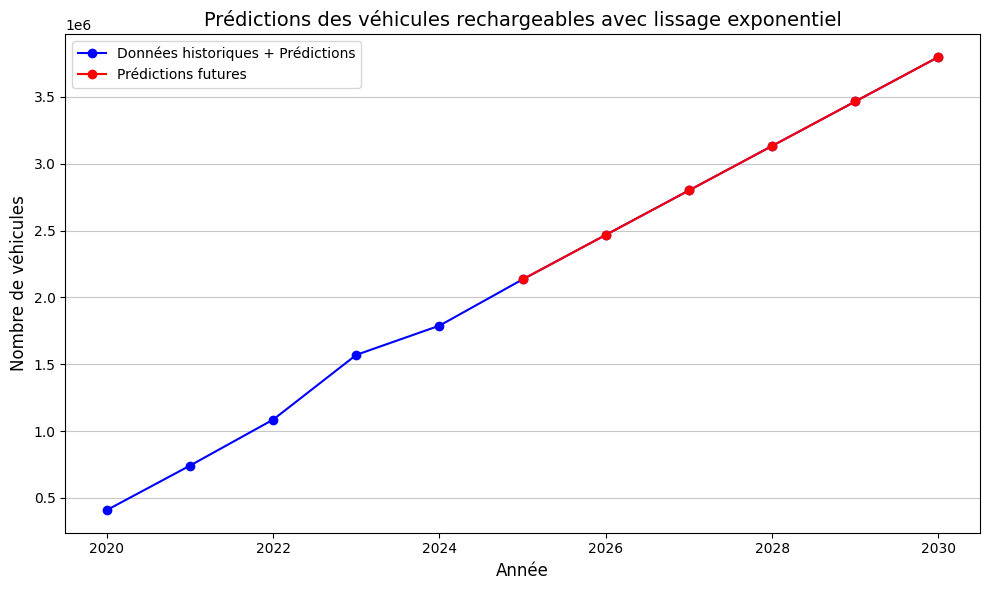

    annee  prediction_nb_vp_rechargeables_el
5    2025                       2.134968e+06
6    2026                       2.467613e+06
7    2027                       2.800258e+06
8    2028                       3.132903e+06
9    2029                       3.465547e+06
10   2030                       3.798192e+06


In [ ]:
# Combiner données historiques et prédictions pour continuité
combined_years = np.concatenate([resultat.index, future_years])
combined_values = np.concatenate([resultat['nb_vp_rechargeables_el'], forecast])

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Données historiques + Prédictions (combinées)
plt.plot(combined_years, combined_values, marker='o', label='Données historiques + Prédictions', color='blue')

# Séparation des points de prédiction pour clarté (facultatif)
plt.plot(future_years, forecast, marker='o', label='Prédictions futures', color='red')

# Personnalisation du graphique
plt.title('Prédictions des véhicules rechargeables avec lissage exponentiel', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de véhicules', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les prédictions
predicted_data = pd.DataFrame({
    'annee': future_years,
    'prediction_nb_vp_rechargeables_el': forecast
})
print(predicted_data)

**Prédiction en utilisant les données trimestrielles**

In [ ]:
nb_electriques_par_trimestre=data.groupby('date_arrete')[['nb_vp_rechargeables_el']].sum()

In [ ]:
nb_electriques_par_trimestre

nb_vp_rechargeables_el
date_arrete                        
2020-12-31                   414963
2021-03-31                   478691
2021-06-30                   562890
2021-09-30                   629202
2021-12-31                   725976
2022-03-31                   801180
2022-06-30                   886980
2022-09-30                   960396
2022-12-31                  1061624
2023-03-31                  1164721
2023-06-30                  1281271
2023-09-30                  1388383
2023-12-31                  1533733
2024-03-31                  1655840
2024-06-30                  1773903

In [ ]:
nb_electriques_par_trimestre.reset_index(inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



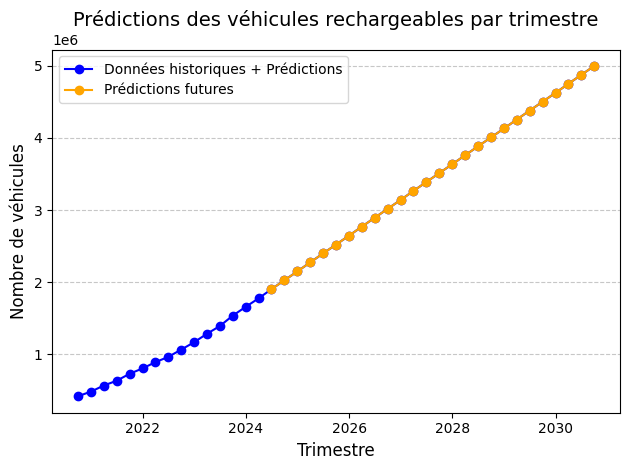

       date_arrete  prediction_nb_vp_rechargeables_el
2024Q3      2024Q3                       1.901129e+06
2024Q4      2024Q4                       2.025062e+06
2025Q1      2025Q1                       2.148995e+06
2025Q2      2025Q2                       2.272928e+06
2025Q3      2025Q3                       2.396860e+06
2025Q4      2025Q4                       2.520793e+06
2026Q1      2026Q1                       2.644726e+06
2026Q2      2026Q2                       2.768658e+06
2026Q3      2026Q3                       2.892591e+06
2026Q4      2026Q4                       3.016524e+06
2027Q1      2027Q1                       3.140457e+06
2027Q2      2027Q2                       3.264389e+06
2027Q3      2027Q3                       3.388322e+06
2027Q4      2027Q4                       3.512255e+06
2028Q1      2028Q1                       3.636188e+06
2028Q2      2028Q2                       3.760120e+06
2028Q3      2028Q3                       3.884053e+06
2028Q4      2028Q4          

In [ ]:
nb_electriques_par_trimestre=data.groupby('date_arrete')[['nb_vp_rechargeables_el']].sum()
nb_electriques_par_trimestre.reset_index(inplace=True)
# Conversion en datetime pour gérer les trimestres
nb_electriques_par_trimestre['date_arrete'] = pd.PeriodIndex(nb_electriques_par_trimestre['date_arrete'], freq='Q')
nb_electriques_par_trimestre.set_index('date_arrete', inplace=True)

# Lissage exponentiel avec tendance
model = ExponentialSmoothing(
    nb_electriques_par_trimestre['nb_vp_rechargeables_el'],
    trend='add',  # Tendance additive
    seasonal=None  # Pas de saisonnalité dans cet exemple
)
fit = model.fit()

# Générer les trimestres futurs jusqu'en 2030
future_periods = pd.period_range(start=nb_electriques_par_trimestre.index[-1] + 1, end='2030Q4', freq='Q')
forecast = fit.forecast(len(future_periods))

# Combiner données historiques et prédictions
combined_index = nb_electriques_par_trimestre.index.append(future_periods)
combined_values = np.concatenate([nb_electriques_par_trimestre['nb_vp_rechargeables_el'], forecast])

# Données historiques
plt.plot(combined_index.to_timestamp(), combined_values , marker='o', label='Données historiques + Prédictions', color='blue')

# Prédictions
plt.plot(future_periods.to_timestamp(), forecast, marker='o', label='Prédictions futures', color='orange')

# Personnalisation
plt.title('Prédictions des véhicules rechargeables par trimestre', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Nombre de véhicules', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les prédictions dans un DataFrame
forecast_data = pd.DataFrame({
    'date_arrete': future_periods,
    'prediction_nb_vp_rechargeables_el': forecast
})
print(forecast_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



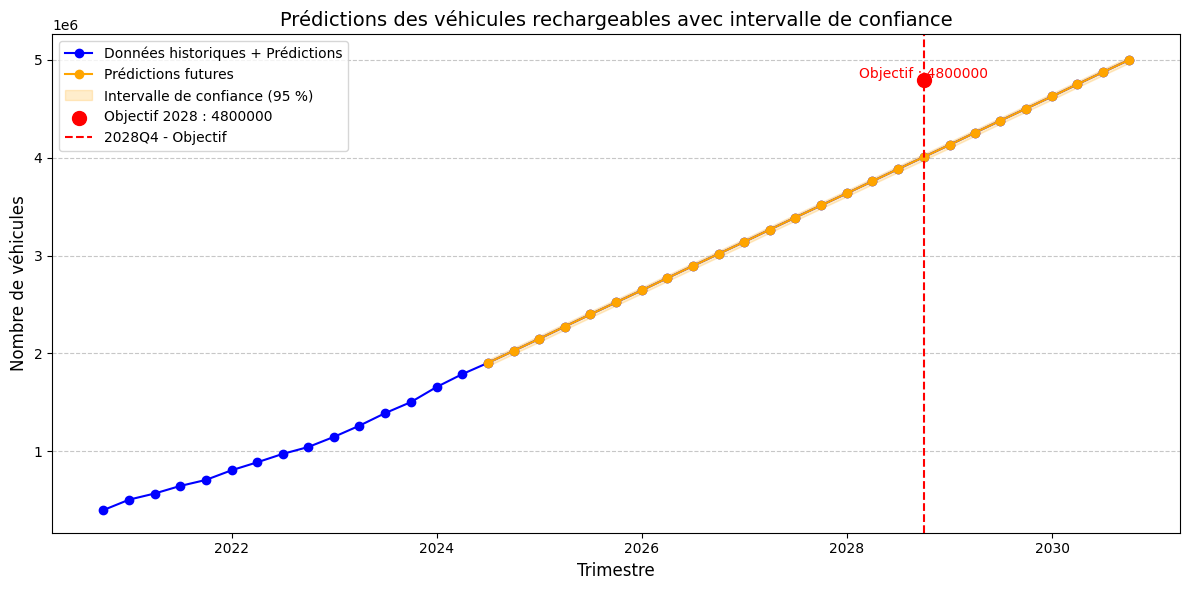

   date_arrete  prediction_nb_vp_rechargeables_el   lower_bound   upper_bound
0       2020Q4                       3.959963e+05  3.646765e+05  4.273161e+05
1       2021Q1                       5.030313e+05  4.717115e+05  5.343511e+05
2       2021Q2                       5.650299e+05  5.337101e+05  5.963497e+05
3       2021Q3                       6.422034e+05  6.108836e+05  6.735232e+05
4       2021Q4                       7.043486e+05  6.730288e+05  7.356684e+05
5       2022Q1                       8.036771e+05  7.723573e+05  8.349969e+05
6       2022Q2                       8.839052e+05  8.525854e+05  9.152250e+05
7       2022Q3                       9.698970e+05  9.385772e+05  1.001217e+06
8       2022Q4                       1.041494e+06  1.010174e+06  1.072814e+06
9       2023Q1                       1.145787e+06  1.114467e+06  1.177107e+06
10      2023Q2                       1.259448e+06  1.228129e+06  1.290768e+06
11      2023Q3                       1.387047e+06  1.355727e+06 

In [ ]:
nb_electriques_par_trimestre=data.groupby('date_arrete')[['nb_vp_rechargeables_el']].sum()
nb_electriques_par_trimestre.reset_index(inplace=True)
# Conversion en datetime pour gérer les trimestres
nb_electriques_par_trimestre['date_arrete'] = pd.PeriodIndex(nb_electriques_par_trimestre['date_arrete'], freq='Q')
nb_electriques_par_trimestre.set_index('date_arrete', inplace=True)

# Lissage exponentiel avec tendance
model = ExponentialSmoothing(
    nb_electriques_par_trimestre['nb_vp_rechargeables_el'],
    trend='add',  # Tendance additive
    seasonal=None  # Pas de saisonnalité dans cet exemple
)
fit = model.fit()

# Générer les trimestres futurs jusqu'en 2030
future_periods = pd.period_range(start=nb_electriques_par_trimestre.index[-1] + 1, end='2030Q4', freq='Q')
forecast = fit.forecast(len(future_periods))

# Calcul des résidus pour estimer l'écart-type
residuals = nb_electriques_par_trimestre['nb_vp_rechargeables_el'] - fit.fittedvalues
std_dev = np.std(residuals)  # Écart-type des résidus

# Intervalle de confiance (95 %)
z_score = 1.96  # Pour un niveau de confiance de 95 %
upper_bound = forecast + z_score * std_dev
lower_bound = forecast - z_score * std_dev

# Créer un DataFrame combiné pour les données historiques + prédictions
combined_index = nb_electriques_par_trimestre.index.append(future_periods)
combined_values = np.concatenate([fit.fittedvalues, forecast])
combined_lower_bound = np.concatenate([fit.fittedvalues - z_score * std_dev, lower_bound])
combined_upper_bound = np.concatenate([fit.fittedvalues + z_score * std_dev, upper_bound])

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Données historiques et prédictions (ligne continue)
plt.plot(combined_index.to_timestamp(), combined_values, marker='o', label='Données historiques + Prédictions', color='blue')

## Prédictions
plt.plot(future_periods.to_timestamp(), forecast, marker='o', label='Prédictions futures', color='orange')

# Intervalle de confiance
plt.fill_between(future_periods.to_timestamp(), lower_bound, upper_bound, color='orange', alpha=0.2, label='Intervalle de confiance (95 %)')

# Ajouter un point pour l'objectif
objectif_date = pd.Period("2028Q4", freq='Q').to_timestamp()

plt.scatter(objectif_date, 4800000, color='red', s=100, label=f'Objectif 2028 : {4800000}')
plt.text(objectif_date, 4800000 + 15000, f'Objectif : {4800000}', color='red', fontsize=10, ha='center')
plt.axvline(x=objectif_date, color='red', linestyle='--', label='2028Q4 - Objectif')


# Personnalisation
plt.title('Prédictions des véhicules rechargeables avec intervalle de confiance', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Nombre de véhicules', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les prédictions dans un DataFrame
forecast_data = pd.DataFrame({
    'date_arrete': combined_index,
    'prediction_nb_vp_rechargeables_el': combined_values,
    'lower_bound': combined_lower_bound,
    'upper_bound': combined_upper_bound
})
print(forecast_data)


In [ ]:
combined_index.to_timestamp()

DatetimeIndex(['2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01',
               '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
               '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01',
               '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01',
               '2024-10-01', '2025-01-01', '2025-04-01', '2025-07-01',
               '2025-10-01', '2026-01-01', '2026-04-01', '2026-07-01',
               '2026-10-01', '2027-01-01', '2027-04-01', '2027-07-01',
               '2027-10-01', '2028-01-01', '2028-04-01', '2028-07-01',
               '2028-10-01', '2029-01-01', '2029-04-01', '2029-07-01',
               '2029-10-01', '2030-01-01', '2030-04-01', '2030-07-01',
               '2030-10-01'],
              dtype='datetime64[ns]', freq='QS-OCT')